<a href="https://colab.research.google.com/github/StrizhAXE/DataAlgoritm/blob/main/Les_6_Algs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев.
Сделать выводы о зависимости ошибки от этих параметров. Подобрать оптимальные значения этих гиперпараметров.

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes

import numpy as np

import matplotlib.pyplot as plt

In [18]:
X, y = load_diabetes(return_X_y=True)

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [20]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [21]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [22]:
def bias(y, z):
    return (y - z)

In [23]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [33]:
# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees
# Шаг
eta = 1

In [139]:
# Максимальная глубина деревьев
max_depth = 3

# Число деревьев в ансамбле
n_trees = 15

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
errors_deep = test_errors
    

In [140]:
errors_depth = []
n_trees_for_deep = 3
for max_depth in range(1, 10):
    trees, train_errors, test_errors = gb_fit(n_trees_for_deep, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    errors_depth.append(test_errors[::-1][0])

In [96]:
def get_error_plot(n_trees, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

График зависимости ошибки от количества деревьев, при max_depth = 3

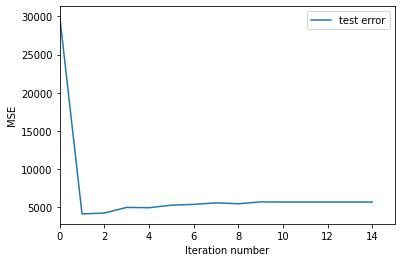

In [141]:
get_error_plot(n_trees, errors_deep)

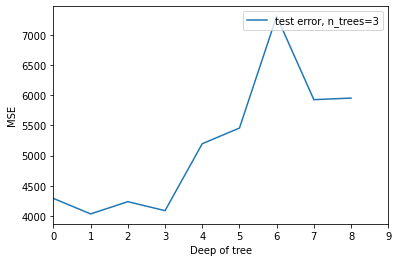

In [147]:
plt.xlabel('Deep of tree')
plt.ylabel('MSE')
plt.xlim(0, len(errors_depth))
plt.plot(list(range(len(errors_depth))), errors_depth, label=f'test error, n_trees={n_trees_for_deep}')
plt.legend(loc='upper right')
plt.show()

In [158]:
# Оптимальные параметры судя по графику 
# Максимальная глубина деревьев
max_depth = 1

# Число деревьев в ансамбле
n_trees = 3
trees, train_errors, test_errors = gb_fit(n_trees_for_deep, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
print(f"При max_depth = {max_depth}, n_trees = {n_trees}\nMSE = {np.round(test_errors[::-1][0], 2)}")

При max_depth = 1, n_trees = 3
MSE = 4291.41
